# IMDB Movie EDA
![ImdbIcon](../images/imdbheader.jpg)

## Notebook Overview

Using both revenue and total score dataframes in my exploratory data analysis. In this notebook, I will discover, identify, and analyze outliers and common trends in both of my datasets. I will also seperate each genre to identify what genre scores the best, and what genre brings in the most revenue. Simialarly, I want to identify which role (actors, actresses, directors) that have the most significant impact on a movie's total score and revenue.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
revenue_df = pd.read_csv('../data/revenue_df.csv')
totalscore_df = pd.read_csv('../data/totalscore_df.csv')

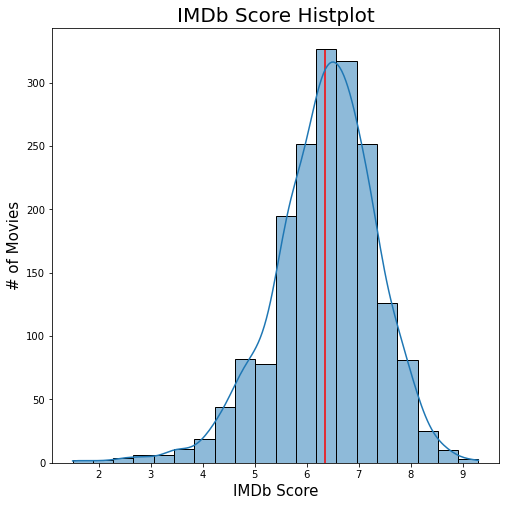

In [3]:
plt.figure(figsize = (8, 8))

sns.histplot(revenue_df['imdb_score'], kde=True, bins = 20);

plt.title("IMDb Score Histplot", size = 20)
plt.xlabel("IMDb Score", size = 15)
plt.ylabel("# of Movies", size = 15);

plt.vlines(x = np.mean(revenue_df['imdb_score']), ymin = 0, ymax = 326, color = 'r');

plt.savefig("../images/total_score_histplot.png")

In [4]:
totalscore_df['imdb_score'].mean()

6.1944177093359

C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


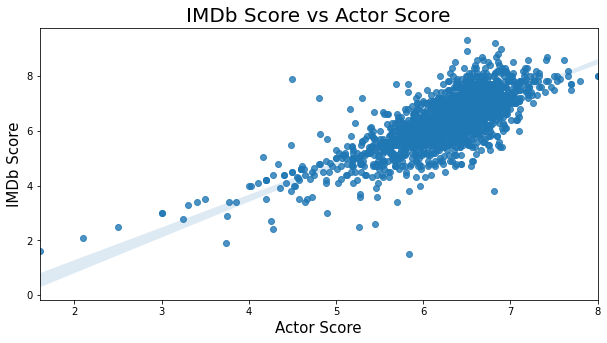

In [5]:
plt.figure(figsize= (10, 5));

sns.regplot(data = revenue_df, x="actor_score", y="imdb_score")

plt.title("IMDb Score vs Actor Score", size = 20)
plt.xlabel("Actor Score", size = 15)
plt.ylabel("IMDb Score", size = 15);

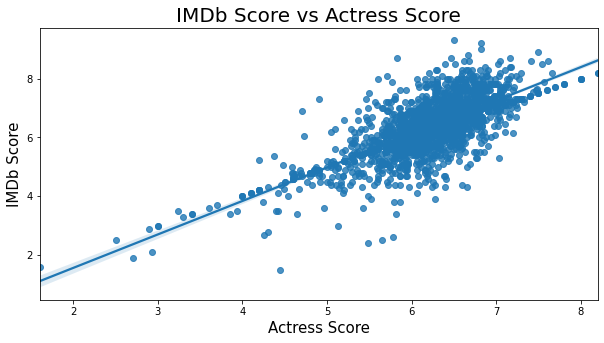

In [6]:
plt.figure(figsize= (10, 5));

sns.regplot(data = revenue_df, x="actress_score", y="imdb_score")

plt.title("IMDb Score vs Actress Score", size = 20)
plt.xlabel("Actress Score", size = 15)
plt.ylabel("IMDb Score", size = 15);

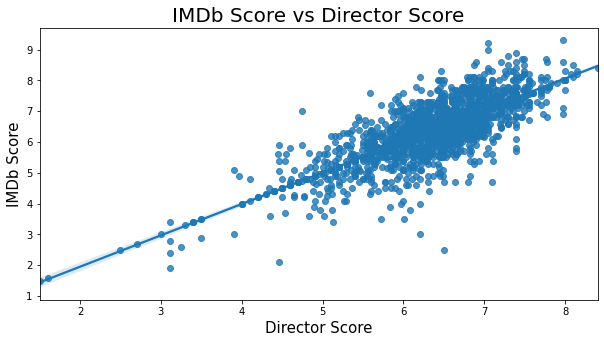

In [7]:
plt.figure(figsize= (10, 5));

sns.regplot(data = revenue_df, x="director_score", y="imdb_score")

plt.title("IMDb Score vs Director Score", size = 20)
plt.xlabel("Director Score", size = 15)
plt.ylabel("IMDb Score", size = 15);

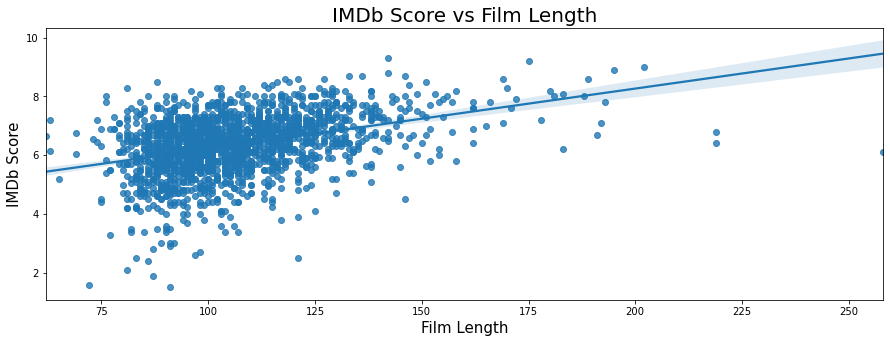

In [8]:
plt.figure(figsize= (15, 5));

sns.regplot(data = revenue_df, x="duration", y="imdb_score")

plt.title("IMDb Score vs Film Length", size = 20)
plt.xlabel("Film Length", size = 15)
plt.ylabel("IMDb Score", size = 15)

plt.xticks();

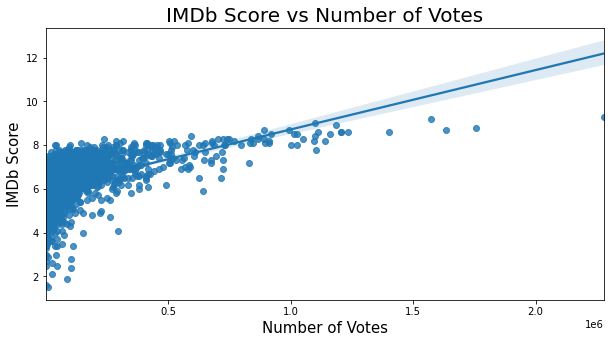

In [9]:
plt.figure(figsize= (10, 5));

sns.regplot(data = revenue_df, x="total_votes", y="imdb_score")

plt.title("IMDb Score vs Number of Votes", size = 20)
plt.xlabel("Number of Votes", size = 15)
plt.ylabel("IMDb Score", size = 15)

plt.xticks();

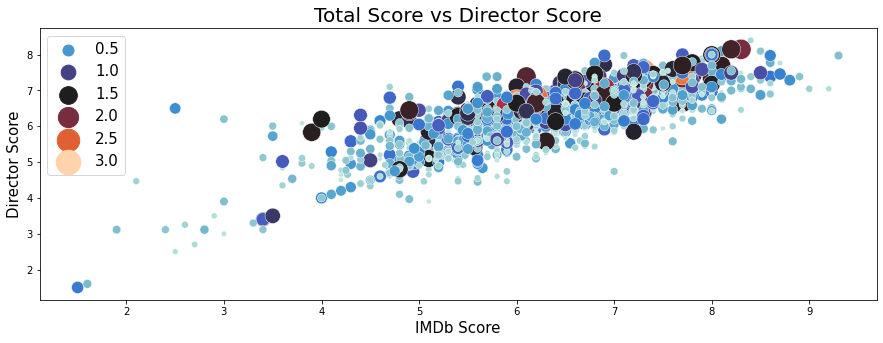

In [10]:
plt.figure(figsize= (15, 5));

sns.scatterplot(data = revenue_df, x="imdb_score", y="director_score", 
                hue = 'budget', size = 'budget', sizes = (25, 600), 
                palette = 'icefire') # icefire / ocean

plt.legend(loc = 'best', fontsize = 15)
plt.title("Total Score vs Director Score", size = 20)
plt.xlabel("IMDb Score", size = 15)
plt.ylabel("Director Score", size = 15);

plt.savefig("../images/directortotalscore_budget.png")

In [11]:
revenue_df[(revenue_df['imdb_score'] < 3.5) & (revenue_df['director_score'] < 4)].sort_values(by = ['budget'], ascending=False)[0:1]

,movie_title,year,tagline,plot,cast,duration,Action,Adventure,Animation,Biography,...,actor_score,actress_score,tagline_sentiment,plot_sentiment,imdb_score,profitable,budget,revenue,budget_adj,revenue_adj
262,Catwoman,2004,CATch Her In IMAX,"A shy woman, endowed with the speed, reflexes,...","Halle Berry, Benjamin Bratt, Sharon Stone, Lam...",104,1.0,0.0,0.0,0.0,...,5.695,5.820089,0.0,0.3182,3.4,0,100000000,82102379,115444540,94782713


In [12]:
revenue_df['rounded_score_one'] = revenue_df['imdb_score'].round(1)
revenue_df['rounded_score_whole'] = revenue_df['imdb_score'].round()

C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


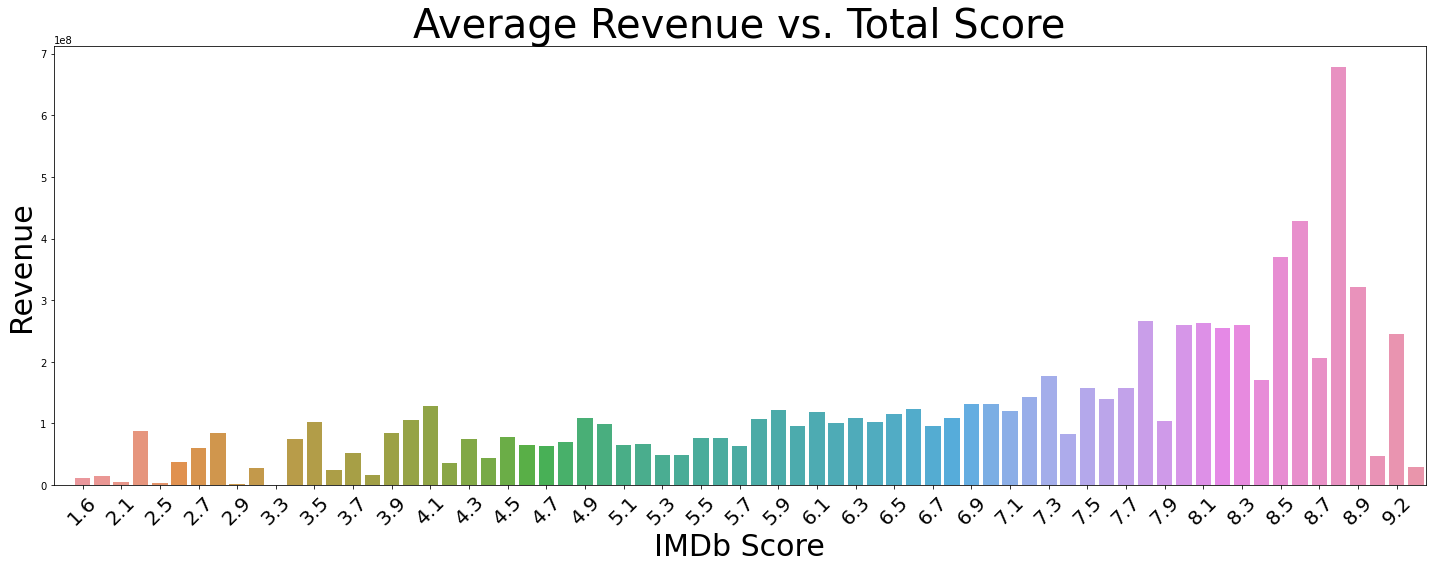

In [13]:
plt.figure(figsize = (20, 8))

average_rev = revenue_df.groupby("rounded_score_one").revenue.mean()
sns.barplot(average_rev.index, average_rev.values)

plt.title("Average Revenue vs. Total Score", size = 40)
plt.xlabel("IMDb Score", size = 30)
plt.xticks((np.arange(1, 71, step=2)), size = 20, rotation = 45)
plt.ylabel("Revenue", size = 30);
plt.tight_layout();

plt.savefig("../images/revenue_totalscore_decimal.png")

C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


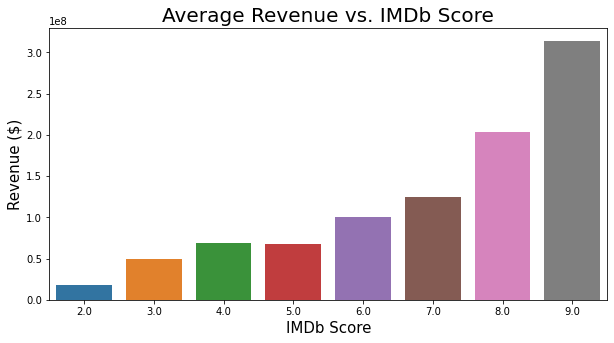

In [14]:
plt.figure(figsize = (10, 5))

average_rev = revenue_df.groupby("rounded_score_whole").revenue.mean()
sns.barplot(average_rev.index, average_rev.values)

plt.title("Average Revenue vs. IMDb Score", size = 20)
plt.xlabel("IMDb Score", size = 15)
plt.ylabel("Revenue ($)", size = 15);

plt.savefig("../images/revenue_totalscore.png")

In [15]:
genres = ['Action', 'Adventure', 'Animation', 'Biography', 
            'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 
            'Music', 'Mystery', 'Romance', 'Sci-Fi', 
            'Sport', 'Thriller', 'War', 'Western']

for genre in genres:
    data = []
    genre_list = []
    revenues = []
    budgets = []
    plot_sent = []
    tag_sent = []
    actor_scores = []
    actress_scores = []
    director_scores = []
    
    for genre in genres:
        genre_list.append(genre)
        
        mean_score = totalscore_df.loc[totalscore_df[genre] == 1, 'imdb_score'].mean()
        data.append(mean_score)
        
        avg_revenue = revenue_df.loc[revenue_df[genre] == 1, 'revenue'].mean()
        revenues.append(avg_revenue.astype(int))
        
        budget = revenue_df.loc[revenue_df[genre] == 1, 'budget'].mean()
        budgets.append(budget.astype(int))
        
        plot_sentiment = totalscore_df.loc[totalscore_df[genre] == 1, 'plot_sentiment'].mean()
        plot_sent.append(plot_sentiment)
        
        tag_sentiment = revenue_df.loc[revenue_df[genre] == 1, 'tagline_sentiment'].mean()
        tag_sent.append(tag_sentiment)
        
        actor_score = totalscore_df.loc[totalscore_df[genre] == 1, 'actor_score'].mean()
        actor_scores.append(actor_score)

        actress_score = totalscore_df.loc[totalscore_df[genre] == 1, 'actress_score'].mean()
        actress_scores.append(actress_score)
        
        director_score = totalscore_df.loc[totalscore_df[genre] == 1, 'director_score'].mean()
        director_scores.append(director_score)

In [16]:
d = {'Genre' : genre_list, 'Avg_IMDbScore': data, 'Avg_Budget' : budgets, 'Avg_Revenue' : revenues, 
     'Avg_PlotSentiment' : plot_sent, 'Avg_TaglineSentiment' : tag_sent, 'Avg_ActorScore' : actor_scores,
    'Avg_ActressScore' : actress_scores, 'Avg_DirectorScore' : director_scores}

In [17]:
imdb_scores = pd.DataFrame(d)

In [18]:
imdb_scores['roi'] = imdb_scores['Avg_Revenue'] / imdb_scores['Avg_Budget']
imdb_scores['casting_score'] = (imdb_scores['Avg_ActorScore'] + imdb_scores['Avg_ActressScore'] + imdb_scores['Avg_DirectorScore']) / 3

In [19]:
imdb_scores.head()

,Genre,Avg_IMDbScore,Avg_Budget,Avg_Revenue,Avg_PlotSentiment,Avg_TaglineSentiment,Avg_ActorScore,Avg_ActressScore,Avg_DirectorScore,roi,casting_score
0,Action,6.126782,59686577,177842213,-0.257879,-0.015335,5.888939,5.837064,6.053940,2.979601,5.926647
1,Adventure,6.309500,78146848,275594873,-0.084908,0.054767,6.039182,6.012408,6.276873,3.526628,6.109488
2,Animation,6.639891,89616646,309501465,0.043687,0.063119,6.157045,6.146505,6.616595,3.453616,6.306715
3,Biography,6.985492,28217276,74233082,0.071511,0.165633,6.275722,6.212399,6.568200,2.630767,6.352107
4,Comedy,6.059554,36632215,112345441,0.016595,0.082145,5.894169,5.869818,6.025117,3.066848,5.929702


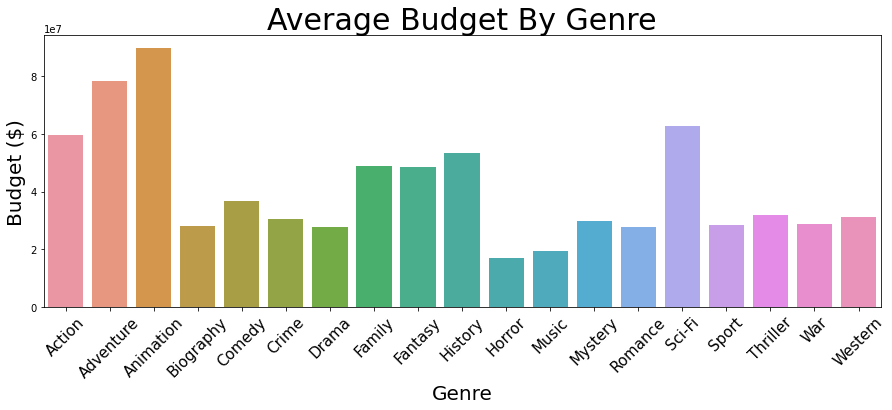

In [20]:
plt.figure(figsize = (15, 5))

sns.barplot(data = imdb_scores, y = 'Avg_Budget', x = 'Genre');

plt.title("Average Budget By Genre", size = 30)
plt.xlabel("Genre", size = 20)
plt.ylabel("Budget ($)", size = 20)
plt.xticks(size = 15, rotation = 45);

plt.savefig("../images/avgbudget_genres.png")

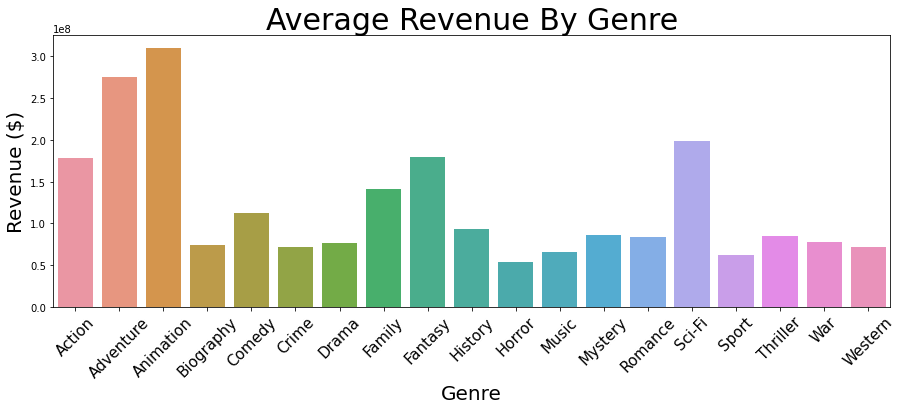

In [21]:
plt.figure(figsize = (15, 5))

sns.barplot(data = imdb_scores, y = 'Avg_Revenue', x = 'Genre');

plt.title("Average Revenue By Genre", size = 30)
plt.xlabel("Genre", size = 20)
plt.ylabel("Revenue ($)", size = 20)
plt.xticks(size = 15, rotation = 45);

plt.savefig("../images/avgrevenue_genres.png")

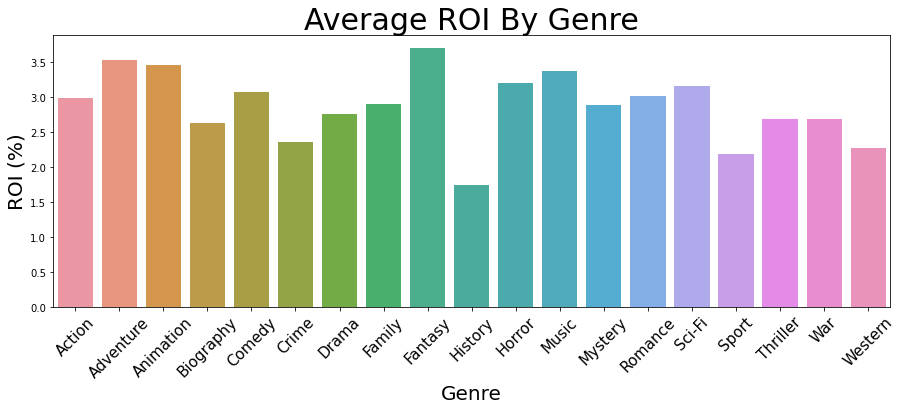

In [22]:
plt.figure(figsize = (15, 5))

sns.barplot(data = imdb_scores, y = 'roi', x = 'Genre');

plt.title("Average ROI By Genre", size = 30)
plt.xlabel("Genre", size = 20)
plt.ylabel("ROI (%)", size = 20)
plt.xticks(size = 15, rotation = 45);

plt.savefig("../images/avgroi_genres.png")

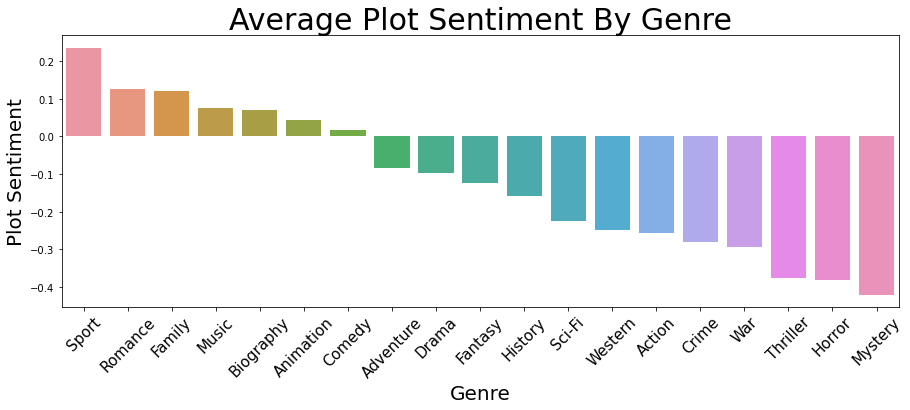

In [23]:
plt.figure(figsize = (15, 5))

sns.barplot(data = imdb_scores.sort_values(by = 'Avg_PlotSentiment', ascending=False), y = 'Avg_PlotSentiment', x = 'Genre');

plt.title("Average Plot Sentiment By Genre", size = 30)
plt.xlabel("Genre", size = 20)
plt.ylabel("Plot Sentiment", size = 20);
plt.xticks(rotation = 45, size = 15);

plt.savefig("../images/avgplotsentiment_genres.png")

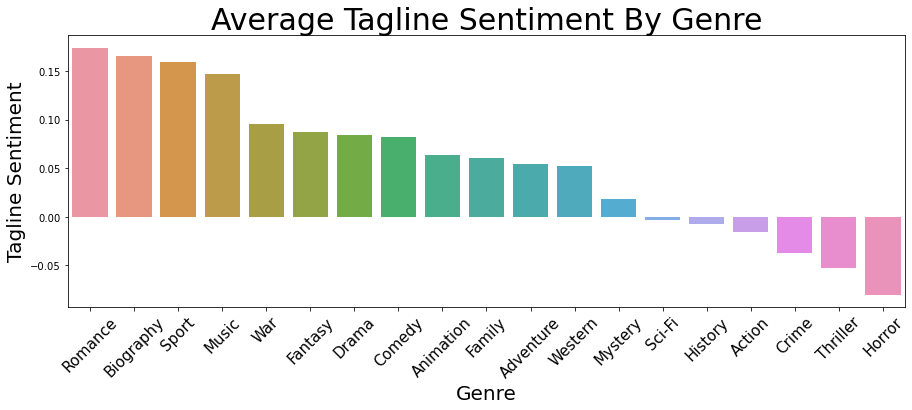

In [24]:
plt.figure(figsize = (15, 5))

sns.barplot(data = imdb_scores.sort_values(by = 'Avg_TaglineSentiment', ascending = False), y = 'Avg_TaglineSentiment', x = 'Genre');

plt.title("Average Tagline Sentiment By Genre", size = 30)
plt.xlabel("Genre", size = 20)
plt.ylabel("Tagline Sentiment", size = 20)
plt.xticks(size = 15, rotation = 45);

plt.savefig("../images/avgtagsentiment_genres.png")

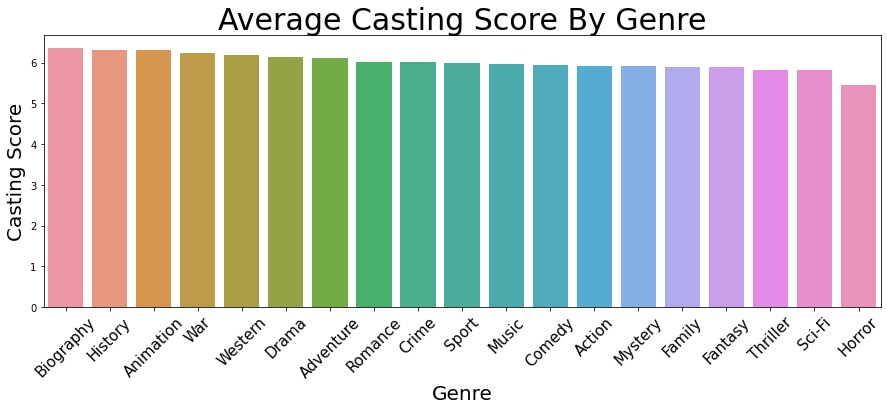

In [25]:
plt.figure(figsize = (15, 5))

sns.barplot(data = imdb_scores.sort_values(by = 'casting_score', ascending = False), x = 'Genre', y = 'casting_score');

plt.title("Average Casting Score By Genre", size = 30)
plt.xlabel("Genre", size = 20)
plt.ylabel("Casting Score", size = 20)
plt.xticks(size = 15, rotation = 45);

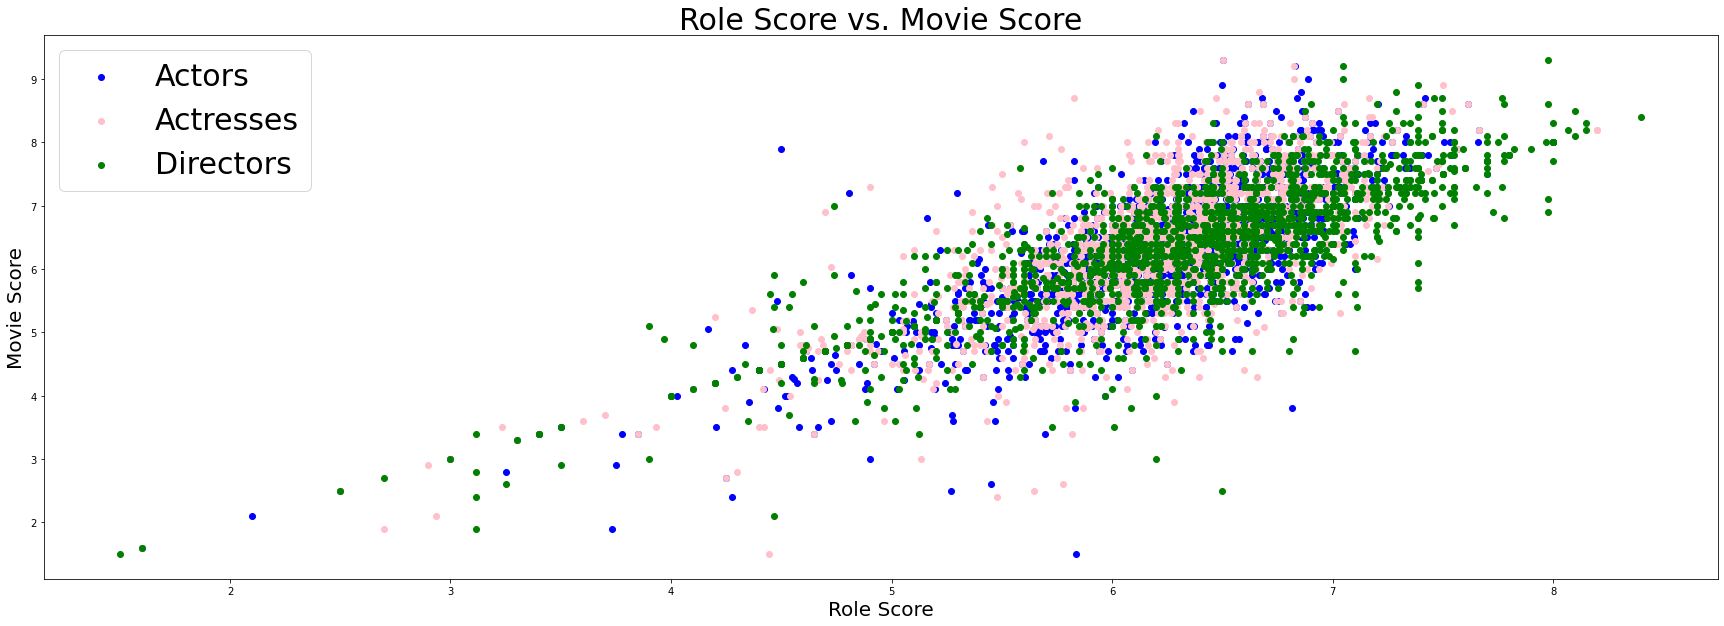

In [26]:
plt.figure(figsize=(30, 10))

plt.scatter(revenue_df['actor_score'],
            revenue_df['imdb_score'], color='blue', label = 'Actors'); 

plt.scatter(revenue_df['actress_score'],
            revenue_df['imdb_score'], color='pink', label = 'Actresses'); 

plt.scatter(revenue_df['director_score'],
            revenue_df['imdb_score'], color='green', label = 'Directors'); 

plt.title("Role Score vs. Movie Score", fontsize=30)
plt.ylabel("Movie Score", fontsize = 20)
plt.xlabel("Role Score", fontsize = 20);

plt.legend(fontsize = 30);

In [27]:
revenue_df.sort_values(by = 'imdb_score', ascending = False).head(3)

,movie_title,year,tagline,plot,cast,duration,Action,Adventure,Animation,Biography,...,tagline_sentiment,plot_sentiment,imdb_score,profitable,budget,revenue,budget_adj,revenue_adj,rounded_score_one,rounded_score_whole
1619,The Shawshank Redemption,1994,Fear can hold you prisoner. Hope can set you f...,Two imprisoned men bond over a number of years...,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",142,0.0,0.0,0.0,0.0,...,-0.1280,-0.4019,9.3,1,25000000,28341469,36777789,41693462,9.3,9.0
1459,The Godfather,1972,An offer you can't refuse.,The aging patriarch of an organized crime dyna...,"Marlon Brando, Al Pacino, James Caan, Richard ...",175,0.0,0.0,0.0,0.0,...,0.2235,-0.6705,9.2,1,6000000,245066411,31287365,1277913732,9.2,9.0
1460,The Godfather: Part II,1974,"I don't feel I have to wipe everybody out, Tom...",The early life and career of Vito Corleone in ...,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",202,0.0,0.0,0.0,0.0,...,-0.4939,-0.4767,9.0,1,13000000,47542841,57489690,210247939,9.0,9.0
